In [10]:
import numpy as np
from math import sqrt
from cmath import log
import qiskit as q

## Basic Circuit Composition

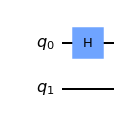

In [2]:
circ1 = q.QuantumCircuit(2)
circ1.h(0)
circ1.draw()

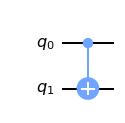

In [3]:
circ2 = q.QuantumCircuit(2)
circ2.cnot(0,1)
circ2.draw()

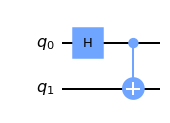

In [4]:
(circ1 + circ2).draw()

# Picking up the Pieces

In [31]:
def init(init_phi, qreg, areg):
    circ = q.QuantumCircuit(qreg, areg)
    circ.initialize(init_phi, qreg)
    circ.barrier()
    return circ

In [18]:
def C(type_, a, qreg, areg):
    sign = 1 if type_ == 1 else -1
    lambda_ = [log(ai + sign*1.j*sqrt(1-ai**2)).imag for ai in a]
    
    circ = q.QuantumCircuit(qreg, areg)
    if type_ == 1:
        circ.x(areg[0])
    circ.x(qreg[0])
    circ.mcp(lambda_[0], [qreg[0],areg[0]], qreg[1])
    circ.mcx([qreg[0],areg[0]], qreg[1])
    circ.mcp(lambda_[0], [qreg[0],areg[0]], qreg[1])
    circ.mcx([qreg[0],areg[0]], qreg[1])
    circ.x(qreg[0])
    circ.mcp(lambda_[1], [qreg[0],areg[0]], qreg[1])
    circ.mcx([qreg[0],areg[0]], qreg[1])
    circ.mcp(lambda_[1], [qreg[0],areg[0]], qreg[1])
    circ.mcx([qreg[0],areg[0]], qreg[1])
    if type_ == 1:
        circ.x(areg[0])
    circ.barrier()
    return circ

In [26]:
def RL(type_, qreg, areg):
    circ = q.QuantumCircuit(qreg, areg)
    if type_ == 'R':
        circ.x(areg[0])
    circ.mcx([qreg[1], areg[0]], qreg[0])
    circ.cx(areg[0], qreg[1])
    if type_ == 'R':
        circ.x(areg[0])
    elif type_ == 'L':
        circ = circ.inverse()
    circ.barrier()
    return circ

In [33]:
def macros(qreg, areg):
    circ = q.QuantumCircuit(qreg, areg)
    circ.swap(qreg[-1], areg[0])
    circ.h(areg[0])
    circ.barrier()
    return circ

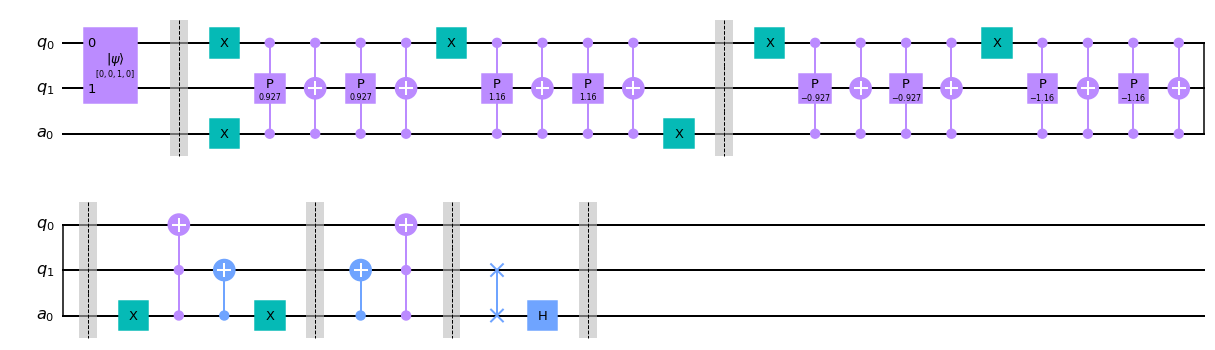

In [36]:
n_phi = 2
#n_qubits = n_phi + 1
init_phi = np.zeros(2**n_phi)
init_phi[2] = 1
qreg = q.QuantumRegister(n_phi, 'q')
areg = q.QuantumRegister(1, 'a')
a = [0.6, 0.4]

circ = init(init_phi, qreg, areg) + C(1, a, qreg, areg) + C(2, a, qreg, areg) + \
       RL('R', qreg, areg) + RL('L', qreg, areg) + macros(qreg, areg)
circ.draw()